## Stocks Analysis

In [3]:
##Import necessary packages for data analysis/simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Import scipy to conduct normal distribution tests
from scipy import stats

#### Data Cleaning

In [4]:
##Pull in data as a pandas dataframe
stocks = pd.read_csv("sp500_joined_returns.csv")

##Filter the stocks dataset to only be the last 400 rows
stocks = stocks.iloc[-401:,]

##Pull in Binary y variable
y = pd.read_csv('SPY.csv')

##Add our y value to the stocks dataset
stocks['y'] = list(y['SPYUpDown'])

In [5]:
##Explore the stocks dataframe
stocks.tail()

##Delete the last day because of missing values
stocks = stocks.head(-1)
stocks.tail()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,y
5266,2020-12-07,-1.570007,-0.540001,-1.200005,0.170013,-0.550003,0.869995,5.250000,-0.879997,2.069992,...,-1.440002,0.830002,-1.129990,-0.450005,-0.290001,-4.450012,-2.939987,-1.029999,0.889999,1
5267,2020-12-08,2.720001,0.000000,1.990005,1.640015,0.860001,1.149994,2.989990,-1.130005,0.089996,...,0.680000,-0.220001,-1.779999,0.899994,0.550003,2.209991,1.630005,1.059998,2.120010,1
5268,2020-12-09,2.619995,-0.779999,0.769997,-6.390015,-3.349991,-0.919998,-12.290009,-2.930000,4.959991,...,-1.719994,-0.450005,-4.230011,-0.450005,0.970001,-1.029999,-0.009995,-0.719997,-0.990005,0
5269,2020-12-10,-1.379990,-0.240005,-1.570000,2.250000,0.290009,0.830002,-6.869995,2.110001,1.970001,...,3.790001,-0.529999,3.110001,0.379997,0.299995,2.330017,-1.169998,0.470001,-1.330002,1
5270,2020-12-11,1.720001,0.919998,-0.670006,-7.750000,-0.059998,0.550003,-0.070007,0.110001,-0.360001,...,-1.689995,0.169998,0.130005,1.080002,0.110001,4.779999,-3.240005,0.299999,1.979996,1


In [6]:
##Explore the stocks dataset to make sure we combined them correctly

In [7]:
##Obtain list of company names present in the pandas dataframe
compNames = list(stocks)

##Create an empty list for companies we will use
useComps = []

##Now determine which stocks do not have any missing values in the columns
for i in compNames:
    
    ##Boolean to asses if there are any missing values in the column 
    if stocks[i].isnull().values.any() == False:
        
        ##If there are not missing values append to a new list
        useComps.append(i)

In [8]:
##Keep only MMM company for now in order to just experiment with this concept
stocks = stocks[useComps]

##Confirms that only the MMM and Date column were kept
print(stocks.head(5),'\n')

##As well, make sure that the data types are correct
print(stocks.info()) ##Need to change the 'Date' column from an object to datetime format 

            Date       MMM       ABT      ABBV      ABMD       ACN      ATVI  \
4871  2019-05-15  0.099991  1.010002  0.269997  5.179993  3.189987  1.789997   
4872  2019-05-16 -2.580002  0.080002  0.519997  3.570007  1.899994  1.020000   
4873  2019-05-17 -0.910004 -0.320000  0.930000 -0.259979  1.940002 -0.420002   
4874  2019-05-20 -1.710007  0.169998  0.800003 -5.599991  1.559998 -2.040001   
4875  2019-05-21  0.290009 -0.529999  0.549995  6.349991 -0.039993 -0.520000   

          ADBE       AMD       AAP  ...      WYNN       XEL      XLNX  \
4871  7.000000  0.709999  0.990005  ...  3.250000 -0.110001  2.930000   
4872  4.919983  0.639999  1.479996  ...  2.159996  0.689999 -3.860001   
4873 -1.829987 -0.190001  2.050003  ... -3.849998  0.590000  0.099998   
4874 -0.649994 -0.299999  1.289993  ...  0.790001  0.119999  0.040001   
4875 -0.139984  0.170000  2.279999  ...  0.700005 -0.339996  1.839996   

           XYL       YUM      ZBRA       ZBH      ZION       ZTS  y  
4871  1.26

#### Data Analysis

Text(0.5, 0.98, 'MMM Daily Returns Histogram')

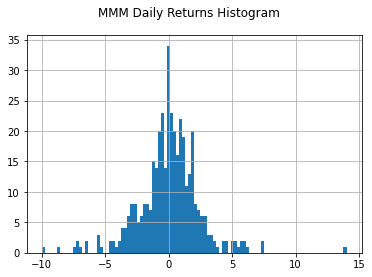

In [9]:
##Plot the distribution of the MMM Stock returns as a histogram
stocks.ADP.hist(bins=100)
plt.suptitle('MMM Daily Returns Histogram') ##Add title to the histogram

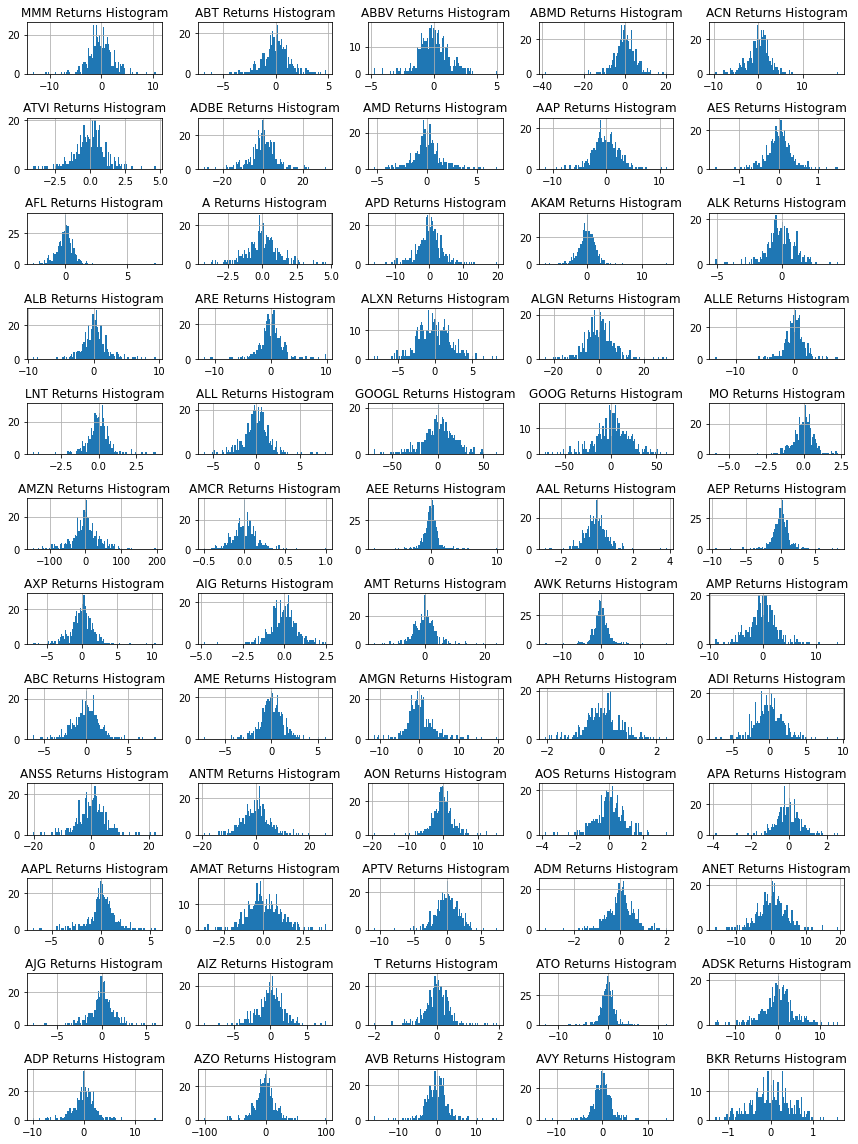

In [10]:
##Create a subplot of the returns of all of our companies
##Resize the plotting canvas
plt.figure(figsize=(12,16))

##Loop to create out subplot
for i in range(60):
    
    ##Define the position we'd like to be in for the subplot
    plt.subplot(12,5,i+1)
    plt.title(useComps[i+1]+' Returns Histogram')
    stocks[useComps[i+1]].hist(bins=100)

##Adjust the layout of the subplot to avoid overlapping plots
plt.tight_layout()

#### Interpretation 

The data seems to have a normal distribution for the returns of each stock. We will assume that then this data is 'practically normal' and model is using a Guassian distribution. We will see results in the statistical test below that counter this but it is well-known that when working with a very large number of datapoints, statsitcial tests are likely to fail in classifying normal distributions as they become very sensitive to slight deviations in normality. Here, we will rely on our visual confirmations that daily returns tend to be Guassian. 

In [11]:
##Create two new dataframes for the x and the y data
x = stocks[['DTE','AEP','EQR','UDR','AEE']].head(-200)
y = stocks['y'].head(-200)

##Store the x and y test data
xtest = stocks[['DTE','AEP','EQR','UDR','AEE']].tail(200)
ytest = stocks['y'].tail(200)

### Run Logistic Regression with Sci-Kit Learn

In [12]:
##Import packages to run logistic regression
from sklearn.linear_model import LogisticRegression

In [13]:
##Define the model for the logistic regression
model = LogisticRegression(solver='liblinear', random_state=0)

##Fit the logistic regression model
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [14]:
##Obtain coefficients and intercept for the logistic regression model
logCof = model.coef_ 
logInt = b = model.intercept_[0]

### Metropolis-Hastings Sampling for Inference

In [15]:
##Need to import multivariate normal distribution before performing simulation
from scipy.stats import multivariate_normal

##### Define Function to Compute Likelihood Probabilities

In [16]:
##Define a function that calculates the likelihood through the x dataset
def likelihood(x,betas,yList):
    
    ##Define a variable set at 1 for the product of all the probabilities
    i = 0
    prod = float(1)
    for index, row in x.iterrows():
        
        ##Only do the following when i<200
        if i<200:
        
            ##Get our y value from the list
            y = yList[i]  

            ##Obtain values of the rows
            dataX = np.array([row['DTE'], row['AEP'], row['EQR'],row['UDR'],row['AEE']])

            ##Store the beta values properly
            b = betas[1:]
            b0 = betas[0]

            ##Calculate the value to go in the exponential
            expValue = b0 + np.matmul(b,np.transpose(dataX))

            ##Store the exponential value to be plugged into the likliehood
            e = np.exp(expValue*y)   

            ##Compute the likelihood
            #l = ((e/(1+e))**y)*((1-(e/(1+e)))**(1-y))
            l = e/(1+np.exp(expValue))

            ##Multiply this to our running probability product
            prod = prod*l

            ##Iterate the counter for the y value
            i+=1
            
        ##Else we exit the loop
        else:
            break ##exit the loop
        
    ##Return the likelihood
    return prod

##### Define Function to Compute Prior Probabilities

In [17]:
##Define a function that gives us the probability of the prior
def prior(betas):
    
    ##Create a multivariate normal distribution 
    normDist = multivariate_normal(mean=[0,0,0,0,0,0], cov=[[1,0,0,0,0,0],[0,1,0,0,0,0],
                                                            [0,0,1,0,0,0],[0,0,0,1,0,0],
                                                            [0,0,0,0,1,0],[0,0,0,0,0,1]])
    
    ##Get the probability for the beta vector input
    priorProb = normDist.pdf(betas)
    
    ##Return the prior probability
    return priorProb

##### Define Function to Create Proposal and Calculate Probabilities

In [18]:
##Define a function to generate a proposal distribition 
def proposal(mean, cov):
    
    ##Generate a multivariate normal based off the mean and covariance parameters
    prop = multivariate_normal(mean, cov)
    
    ##Return this proposal distribution
    return prop

##Define a function to get the probability of a candidate from the proposal distribution
def propProb(betas,dist):
    
    ##Get the probability of the candidate betas
    prob = dist.pdf(betas)
    
    ##Return this probability
    return prob

##### Define Function to Perform Metropolis-Hastings for Regression Coefficients

In [19]:
##Define a function to carry out Metropolis-Hastings
def metHast(start,iters,propDist,x,y):
    
    ##Create a list to store all betas in 
    betas = []
    
    ##Iterate through specified number of iterations
    for i in range(iters):
        if i == 50000:
            print('y')
        ##Draw a candidate from the proporsal distribution
        cand = propDist.rvs()
        
        ##Calculate the target pdf for the candiate and starting betas
        tCand = likelihood(x,cand,y)*prior(cand)
        tStart = likelihood(x,start,y)*prior(start)

        ##Calculate the proposal probabilitys for the candidate and starting betas
        pCand = propProb(cand,propDist)
        pStart = propProb(start,propDist)
        
        ##Define the acceptance constant
        a = (tCand*pStart)/(tStart*pCand)
        
        ##Conditionals to assess if the new betas will be accepted
        if a>=1:
            
            ##We accept the candidate betas
            start = cand
            
        ##Else statement to draw from unfirom random
        else:
            u = np.random.uniform(0,1)
            if u<a:
                start = cand
            else:
                start = start
        ##Append the new betas
        betas.append(start)
        
    ##Return our sampled parameters
    return betas

In [20]:
##Try out the metropolis hastings algorithm
start = [0,0,0,0,0,0]
iters = 100000
propDist = multivariate_normal(mean=[0,0,0,0,0,0], cov=[[1,0,0,0,0,0],[0,1,0,0,0,0],
                                                        [0,0,1,0,0,0],[0,0,0,1,0,0],
                                                       [0,0,0,0,1,0],[0,0,0,0,0,1]])
betas = metHast(start,iters,propDist,x,list(y))

y


In [21]:
##Find the median values from what we have inferred
arr = np.array(betas[10000:])

In [22]:
coeffs = np.median(arr,axis=0)

In [23]:
coeffs

array([ 0.23318551,  0.36352543, -0.49232342,  0.566158  ,  0.58944846,
        0.38385091])

In [25]:
from numpy import savetxt
savetxt('betaDist.csv', betas, delimiter=',')

In [38]:
np.append(logCof,b)

array([ 0.33743561, -0.42976002,  0.60368387,  0.47281755,  0.35754993,
        0.23127087])

In [39]:
#savetxt('metropCoeff.csv', coeffs, delimiter=',')
savetxt('logInt.csv',np.append(logCof,b),delimiter=',')

##### Define a Function to Compute Predictions for each Model

In [41]:
##Define function to compute the predicted probabilities from the model
##Test x is the testing data we are making predictions for
def predict(testx,coefficients,intercept):
    
    ##Calculate the predictions
    outputs  = np.matmul(testx,coefficients.T)+intercept
    
    ##Return the predictions
    return outputs

##### Define Function to Compute the Models Performance Metrics

In [79]:
##Define function that turns probabilistic predictions in binary predictions
def probConvert(preds):
    
    ##Create an empty list to fill in with binary predictions
    predBin = []
    
    ##Iterate through probability predictions
    for i in preds:
        
        ##Conditional to assess whether to assign a 0 or 1 prediction to the binary prediction list
        if i<0:
            predBin.append(0)
        else:
            predBin.append(1)
            
    ##Return the new binary predictions
    return predBin

##Define function to compute models performance metrics
##Takes a list of predictions and a list of y values to test the predictions, predictions should be binary
def metrics(preds,testy):
    
    ##Create a variable to keep count of the total number of observations correctly predicted
    correct = 0
    
    ##Iterate through the predictions and test y to assess accuracy
    for i,j in zip(preds,list(y)):
        
        ##Conditional to assess if prediction is correct
        if i==j:
            
            ##Add to count of correct predictions
            correct+=1
            
    ##Return the count of correct predictions (can calculate other measures later once we know what we're doing)
    return correct

In [43]:
##Compute predictions for the Metropolis-Hastings Parameters
predM = predict(xtest,coeffs[1:],coeffs[0])

##Convert the predicted probabilities to binary predictions
binaryM = probConvert(predM)

In [74]:
##Compute Predictions for the logistic regression parameters
lCofs = [logCof[0][0],logCof[0][1],logCof[0][2],logCof[0][3],logCof[0][4]]
predL = predict(xtest,np.transpose(lCofs),b)

##Convert predicted probabilities to binary predictions
binaryL = probConvert(predL)

In [77]:
savetxt('predL.csv',predL,delimiter=',')

In [80]:
metrics(binaryM,ytest)

116

In [81]:
metrics(binaryL,ytest)

115